# Boosting

## Plan

In this notebook we discuss:
1. Boosting 
2. Regression trees

Boosting is a technique for training and combining a set of weak learners (classifiers, regressors) to achieve a single strong learner 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

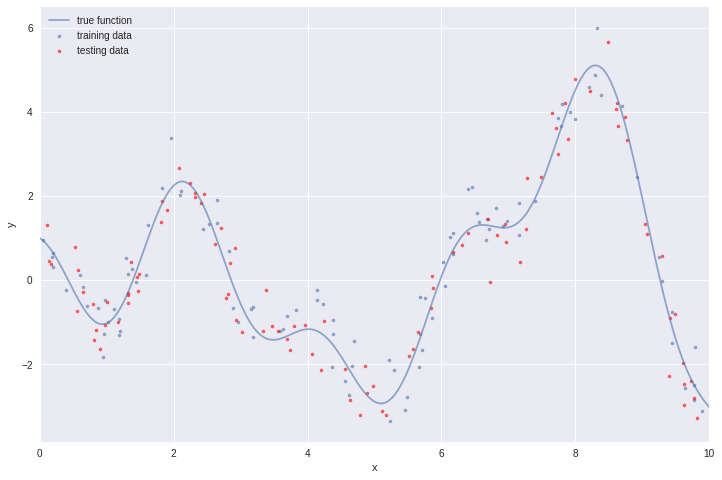

In [2]:
np.random.seed(0)

def true_model(x):
    return 0.5*x * np.sin(x) - 0.5*np.sin(2 * x) + np.sin(3 * x+np.pi/2)

def gen_data(n_samples=200):
    Ntrain = np.floor(n_samples/2).astype(int)
    Ntest = n_samples-Ntrain
    
    x_train = np.random.uniform(0, 10, size=Ntrain)
    y_train = true_model(x_train) + 0.5 * np.random.normal(size=Ntrain)
    x_test  = np.random.uniform(0, 10, size=Ntest)
    y_test  = true_model(x_test) + 0.5 * np.random.normal(size=Ntest)
    
    return x_train[:,np.newaxis], x_test[:,np.newaxis], y_train, y_test
    

X_train, X_test, y_train, y_test = gen_data(200)

x_plot = np.linspace(0, 10, 500)

def plot_data(X_train, X_test, y_train, y_test,alpha=0.6,figsize=(12, 8)):
    
    plt.figure(figsize=figsize)
    gt = plt.plot(x_plot, true_model(x_plot), alpha=alpha, label='true function')

    # plot training and testing data
    plt.scatter(X_train, y_train, s=10, alpha=alpha, label='training data')
    plt.scatter(X_test, y_test, s=10, alpha=alpha, color='red', label='testing data')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend(loc='upper left')
    
plot_data(X_train, X_test, y_train, y_test)

### Fitting a single tree to the data

If we fit an **individual** regression tree with depth 1 to the above data you get a piece-wise constant approximation.

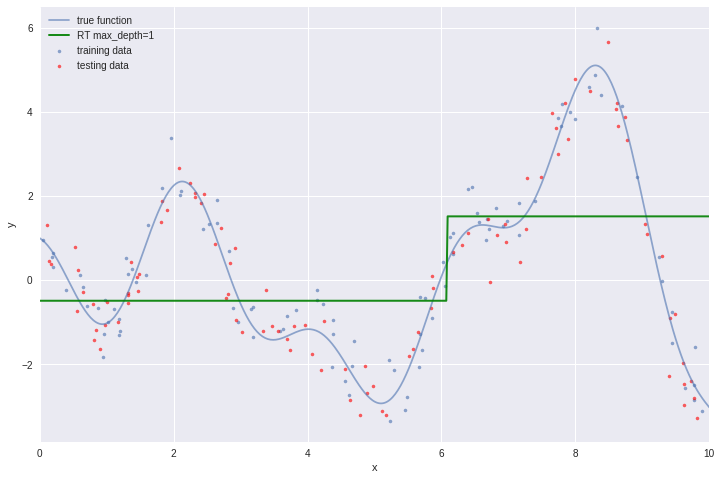

In [3]:
from sklearn.tree import DecisionTreeRegressor

plot_data(X_train, X_test, y_train, y_test)
est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=1', color='g', alpha=0.9, linewidth=2)
plt.legend(loc='upper left');

If we fit an **individual** regression tree with depth 1 to the above data you get a piece-wise constant approximation.

In [ ]:
plot_data(X_train, X_test, y_train, y_test)
est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=1', color='g', alpha=0.9, linewidth=2)
plt.legend(loc='upper left');

And as we add more depth to the data, we get a better fit to the training data.

In [ ]:
plot_data(X_train, X_test, y_train, y_test)
est = DecisionTreeRegressor(max_depth=20).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),label='RT max_depth=20', color='g', alpha=0.7, linewidth=1)
plt.legend(loc='upper left');

### Fitting a collection of trees to the data

We'll use Scikit-Learn's `GradientBoostingRegressor` to experiment with training a single strong regressor by combining multiple weak regressors. 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

plot_data(X_train, X_test, y_train, y_test)
ax = plt.gca()

est = GradientBoostingRegressor(n_estimators=3, max_depth=1, learning_rate=1.0,warm_start=True)
est.fit(X_train, y_train)
pred = est.predict(x_plot[:,np.newaxis])
plt.plot(x_plot, pred, color='g', alpha=0.7,label="n_estimators=3")
plt.legend(loc='upper left');

Boosting only uses simple base models, which in the example above it means trees with perhaps depth of no more than 1 or 2, but it gradually combines many of them to get an ensemble which, as a whole, captures the underlying data in increasing accuracy. 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

plot_data(X_train, X_test, y_train, y_test)
ax = plt.gca()

clr = list('mgbkr')
for n, n_estimators in enumerate([1,2,5,10,1000]):
    est = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=1, learning_rate=1.0,warm_start=True)
    est.fit(X_train, y_train)
    pred = est.predict(x_plot[:,np.newaxis])
    plt.plot(x_plot, pred, color=clr[n], alpha=0.7,label="n_estimators={}".format(n_estimators))
plt.legend(loc='upper left');

### Choosing a model

To choose an appropriate model, we can compare the train and test performance

In [ ]:
def plotError(est, X_test, y_test):

    fig = plt.figure(figsize=(12, 8))
    ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, np.array([est.loss_(y_test, pred) for pred in est.staged_predict(X_test)]), color='b', label='Test', linewidth=2)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color='g', label='Train', linewidth=2)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim((0, 3))
    ax.legend()
    
    return

In [ ]:
plotError(est, X_test, y_test)

**Exercise**

1. Repeat the procedure above for selecting the best number of trees in the ensemble, where each weak tree can have max depth of 2 (instead of 1 as before). 
2. Plot the regressor you chose. 

In [ ]:
# 1
plot_data(X_train, X_test, y_train, y_test)
max_depth = # COMPLETE THIS LINE
n_estimators = # COMPLETE THIS LINE
ax = plt.gca()
est = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=1.0,warm_start=True)
est.fit(X_train, y_train)
pred = est.predict(x_plot[:,np.newaxis])
plt.plot(x_plot, pred, color='r')
plt.legend();

plotError(est, X_test, y_test)

In [ ]:
# 2 
plot_data(X_train, X_test, y_train, y_test)
max_depth = 2
Optimal_n_estimators = # COMPLETE THIS LINE
ax = plt.gca()
est = GradientBoostingRegressor(n_estimators=Optimal_n_estimators, max_depth=max_depth, learning_rate=1.0,warm_start=True)
est.fit(X_train, y_train)
pred = est.predict(x_plot[:,np.newaxis])
plt.plot(x_plot, pred, color='r',labels = 'selected regressor')
plt.legend(loc = 'upper left');

## Bonus: ranking features importance

**Boston housing data** includes house prices in suburbs of Boston (506 samples with 13 features and a single target variable)

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

In [ ]:
data = load_boston()
data.feature_names

- CRIM: per capita crime rate by town.
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Dummy variable.
- NOX: nitrogen oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted mean of distances to five Boston employment centres.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per \$10,000.
- PTRATIO: pupil-teacher ratio by town.
- BLACK: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- LSTAT: lower status of the population (percent).
- MEDV: median value of owner-occupied homes in \$1000s.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=1000, max_depth=2)

In [ ]:
X = data['data']
y = data['target']

In [ ]:
model.fit(X, y);

In [ ]:
ind = np.argsort(model.feature_importances_)[::-1]
imp = model.feature_importances_[ind]

In [ ]:
fig, ax = plt.subplots(1, 1)
labels = data['feature_names'][ind]
pd.Series(imp, index=labels).plot('bar', ax=ax)
ax.set_title('Features importance');